# **#時系列でやってみる**

# **#**

Missing values in y_train: 194501
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/tmp/ipykernel_6791/492408173.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/tmp/ipykernel_6791/492408173.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace=True)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 3.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.8min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total 

/home-asustor/teramoto/.conda/envs/detectron2/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 4.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 7.6min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 7.4min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 7.6min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 2.5min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 4.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 4.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 4.9min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 2.5min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total 

/tmp/ipykernel_6791/492408173.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)
/tmp/ipykernel_6791/492408173.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_bikes_available'] = best_model.predict(X_test)
/tmp/ipykernel_6791/492408173.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

        id  predicted_bikes_available
8761  8761                          7
8762  8762                          7
8763  8763                          7
8764  8764                          7
8765  8765                          7


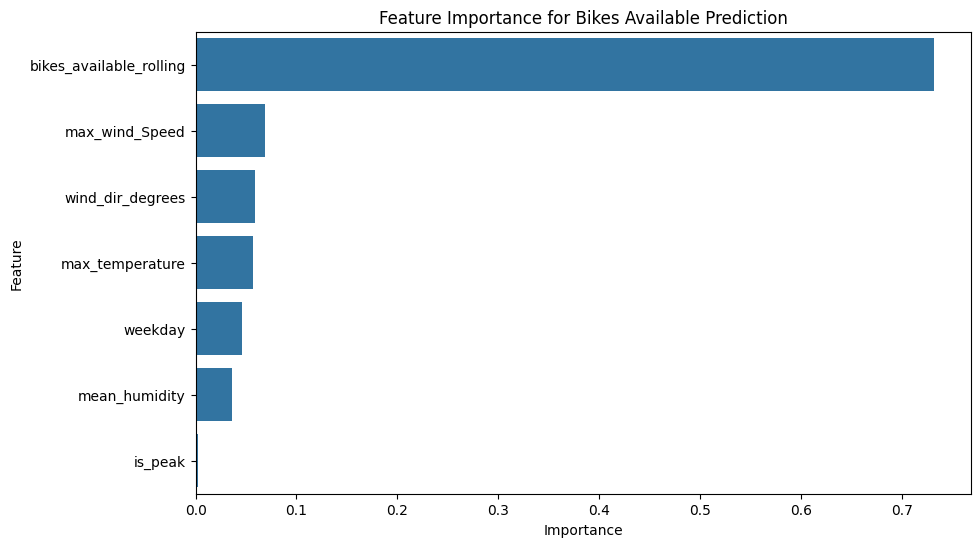

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: データの読み込み
status_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/status.csv')
weather_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/weather.csv')

# 天気データの日付と時間を抽出
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day

# Step 2: 特徴量の追加（曜日、ピーク時間帯、過去24時間のデータ）
status_data = pd.merge(status_data, weather_data, on=['year', 'month', 'day'], how='left')
status_data['weekday'] = pd.to_datetime(status_data['date']).dt.weekday
status_data['is_peak'] = status_data['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

# 過去24時間のバイク利用数の平均を追加
status_data['bikes_available_rolling'] = status_data.groupby('station_id')['bikes_available'].rolling(window=24).mean().reset_index(0, drop=True)

# Step 3: トレーニングデータの準備 (sunny_data かつ predict == 0)
sunny_data = status_data[status_data['events'].isna()]
train_data = sunny_data[sunny_data['predict'] == 0]

# 使用する特徴量を定義
features = ['max_temperature', 'mean_humidity', 'wind_dir_degrees', 'max_wind_Speed', 
            'weekday', 'is_peak', 'bikes_available_rolling']

X_train = train_data[features]
y_train = train_data['bikes_available']

# 欠損値の確認と処理
print(f"Missing values in y_train: {y_train.isna().sum()}")
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

# Step 4: ハイパーパラメータのチューニング
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータを表示
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Step 5: モデルの評価（クロスバリデーション）
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE: {(-cross_val_scores.mean()) ** 0.5}")

# Step 6: テストデータの準備 (sunny_data かつ predict == 1)
test_data = sunny_data[sunny_data['predict'] == 1]
X_test = test_data[features]
X_test.fillna(0, inplace=True)

# Step 7: 予測の実行
test_data['predicted_bikes_available'] = best_model.predict(X_test)
test_data['predicted_bikes_available'] = test_data['predicted_bikes_available'].round().astype(int)

# Step 8: 結果の表示と保存
print(test_data[['id', 'predicted_bikes_available']].head())

# 予測結果をファイルに保存
output_data = test_data[['id', 'predicted_bikes_available']]
output_data.to_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/predicted_bikes_available.csv', index=False, header=False)

# Step 9: 特徴量の重要度を確認
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Bikes Available Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Missing values in y_train: 223205
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/tmp/ipykernel_14062/2709660533.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/tmp/ipykernel_14062/2709660533.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace=True)


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.2min[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.2min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.3min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 4.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 4.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 4.4min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total ti

/home-asustor/teramoto/.conda/envs/detectron2/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 6.1min
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 6.2min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 6.1min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 2.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 5.8min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 2.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 2.9min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tota

/tmp/ipykernel_14062/2709660533.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)
/tmp/ipykernel_14062/2709660533.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_bikes_available'] = best_model.predict(X_test)
/tmp/ipykernel_14062/2709660533.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

        id  predicted_bikes_available
8761  8761                          8
8762  8762                          8
8763  8763                          8
8764  8764                          8
8765  8765                          8


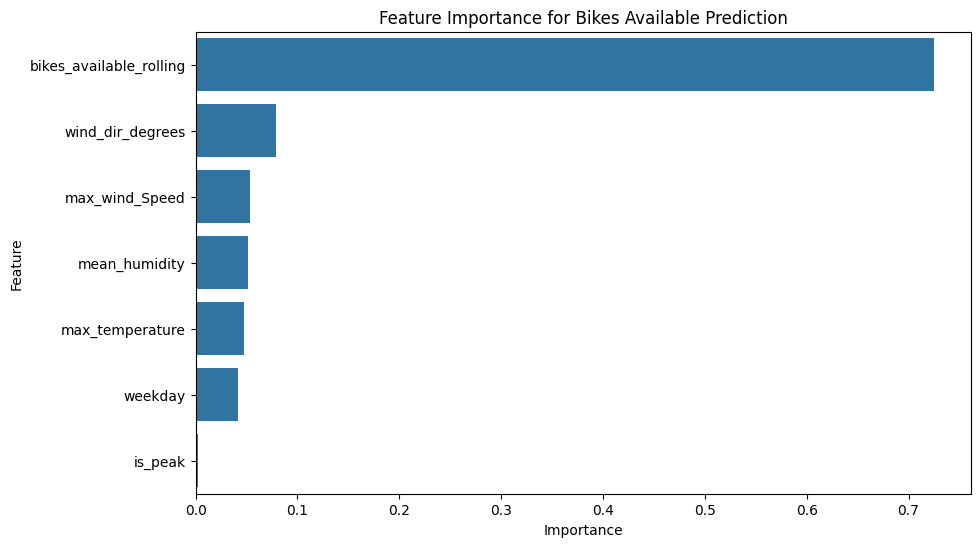

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: データの読み込み
status_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/status.csv')
weather_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/weather.csv')

# 天気データの日付と時間を抽出
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day

# Step 2: 特徴量の追加（曜日、ピーク時間帯、過去24時間のデータ）
status_data = pd.merge(status_data, weather_data, on=['year', 'month', 'day'], how='left')
status_data['weekday'] = pd.to_datetime(status_data['date']).dt.weekday
status_data['is_peak'] = status_data['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

# 過去24時間のバイク利用数の平均を追加
status_data['bikes_available_rolling'] = status_data.groupby('station_id')['bikes_available'].rolling(window=24).mean().reset_index(0, drop=True)

# Step 3: トレーニングデータの準備 (全 predict == 0 のデータを使用)
train_data = status_data[status_data['predict'] == 0]

# 使用する特徴量を定義
features = ['max_temperature', 'mean_humidity', 'wind_dir_degrees', 'max_wind_Speed', 
            'weekday', 'is_peak', 'bikes_available_rolling']

X_train = train_data[features]
y_train = train_data['bikes_available']

# 欠損値の確認と処理
print(f"Missing values in y_train: {y_train.isna().sum()}")
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

# Step 4: ハイパーパラメータのチューニング
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最適なハイパーパラメータを表示
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Step 5: モデルの評価（クロスバリデーション）
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE: {(-cross_val_scores.mean()) ** 0.5}")

# Step 6: テストデータの準備 (全ての predict == 1 のデータを使用)
test_data = status_data[status_data['predict'] == 1]
X_test = test_data[features]
X_test.fillna(0, inplace=True)

# Step 7: 予測の実行
test_data['predicted_bikes_available'] = best_model.predict(X_test)
test_data['predicted_bikes_available'] = test_data['predicted_bikes_available'].round().astype(int)

# Step 8: 結果の表示と保存
print(test_data[['id', 'predicted_bikes_available']].head())

# 予測結果をファイルに保存
output_data = test_data[['id', 'predicted_bikes_available']]
output_data.to_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/predicted_bikes_available.csv', index=False, header=False)

# Step 9: 特徴量の重要度を確認
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Bikes Available Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Missing values in y_train: 223205


/tmp/ipykernel_14062/3807876666.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/tmp/ipykernel_14062/3807876666.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace=True)


Cross-validated RMSE: 2.6311737296114397


/tmp/ipykernel_14062/3807876666.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)
/tmp/ipykernel_14062/3807876666.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_bikes_available'] = best_model.predict(X_test)
/tmp/ipykernel_14062/3807876666.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

        id  predicted_bikes_available
8761  8761                          8
8762  8762                          8
8763  8763                          8
8764  8764                          8
8765  8765                          8


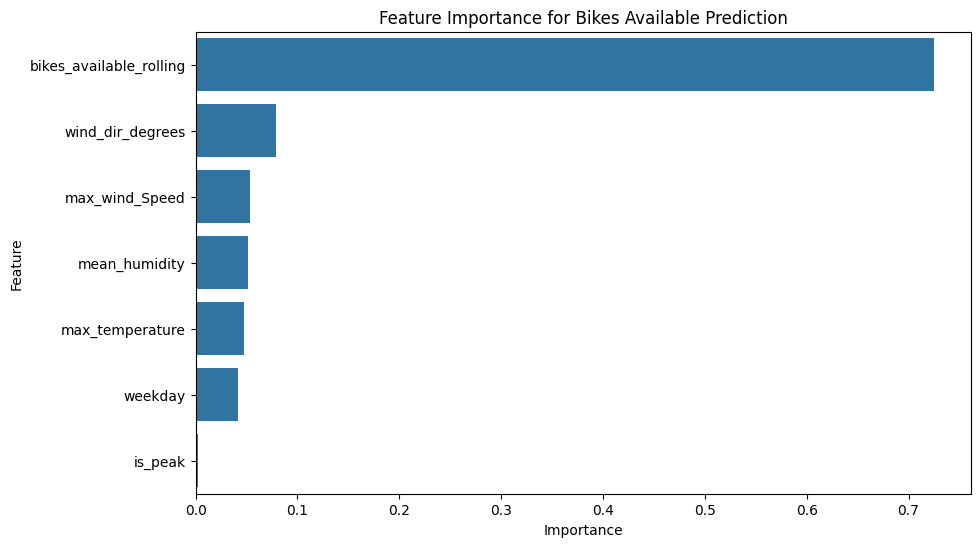

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: データの読み込み
status_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/status.csv')
weather_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/weather.csv')

# 天気データの日付と時間を抽出
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day

# Step 2: 特徴量の追加（曜日、ピーク時間帯、過去24時間のデータ）
status_data = pd.merge(status_data, weather_data, on=['year', 'month', 'day'], how='left')
status_data['weekday'] = pd.to_datetime(status_data['date']).dt.weekday
status_data['is_peak'] = status_data['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

# 過去24時間のバイク利用数の平均を追加
status_data['bikes_available_rolling'] = status_data.groupby('station_id')['bikes_available'].rolling(window=24).mean().reset_index(0, drop=True)

# Step 3: トレーニングデータの準備 (predict == 0 の全データを使用)
train_data = status_data[status_data['predict'] == 0]

# 使用する特徴量を定義
features = ['max_temperature', 'mean_humidity', 'wind_dir_degrees', 'max_wind_Speed', 
            'weekday', 'is_peak', 'bikes_available_rolling']

X_train = train_data[features]
y_train = train_data['bikes_available']

# 欠損値の確認と処理
print(f"Missing values in y_train: {y_train.isna().sum()}")
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

# Step 4: ランダムフォレストモデルの訓練 (最適パラメータを使用)
best_model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=20, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    random_state=42
)

best_model.fit(X_train, y_train)

# Step 5: モデルの評価（クロスバリデーション）
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE: {(-cross_val_scores.mean()) ** 0.5}")

# Step 6: テストデータの準備 (predict == 1 の全データ)
test_data = status_data[status_data['predict'] == 1]
X_test = test_data[features]
X_test.fillna(0, inplace=True)

# Step 7: 予測の実行
test_data['predicted_bikes_available'] = best_model.predict(X_test)
test_data['predicted_bikes_available'] = test_data['predicted_bikes_available'].round().astype(int)

# Step 8: 結果の表示と保存
print(test_data[['id', 'predicted_bikes_available']].head())

# 予測結果をファイルに保存
output_data = test_data[['id', 'predicted_bikes_available']]
output_data.to_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/ARIMA02_predicted_bikes_available.csv', index=False, header=False)

# Step 9: 特徴量の重要度を確認
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Bikes Available Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


/tmp/ipykernel_14062/3109363503.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
/tmp/ipykernel_14062/3109363503.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train.fillna(0, inplace=True)


Cross-validated RMSE: 2.870895265895176


/tmp/ipykernel_14062/3109363503.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)
/tmp/ipykernel_14062/3109363503.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_bikes_available'] = best_model.predict(X_test)
/tmp/ipykernel_14062/3109363503.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

        id  predicted_bikes_available
8761  8761                          5
8762  8762                          5
8763  8763                          5
8764  8764                          5
8765  8765                          5


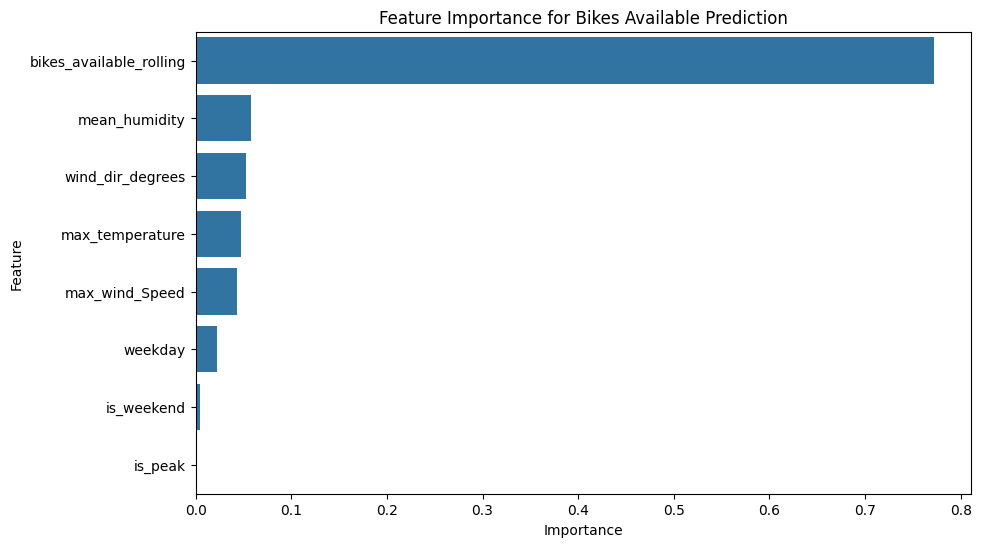

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: データの読み込み
status_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/status.csv')
weather_data = pd.read_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/weather.csv')

# 天気データの日付と時間を抽出
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day

# Step 2: 特徴量の追加（曜日、ピーク時間帯、過去24時間のデータ）
status_data = pd.merge(status_data, weather_data, on=['year', 'month', 'day'], how='left')
status_data['weekday'] = pd.to_datetime(status_data['date']).dt.weekday
status_data['is_peak'] = status_data['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)
status_data['is_weekend'] = status_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 過去24時間のバイク利用数の平均を追加
status_data['bikes_available_rolling'] = status_data.groupby('station_id')['bikes_available'].rolling(window=24).mean().reset_index(0, drop=True)

# Step 3: トレーニングデータの準備 (predict == 0 の全データを使用)
train_data = status_data[status_data['predict'] == 0]

# 使用する特徴量を定義
features = ['max_temperature', 'mean_humidity', 'wind_dir_degrees', 'max_wind_Speed', 
            'weekday', 'is_peak', 'is_weekend', 'bikes_available_rolling']

X_train = train_data[features]
y_train = train_data['bikes_available']

# 欠損値の確認と処理
X_train.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)

# Step 4: ランダムフォレストモデルの訓練 (正則化強化)
best_model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=10, 
    min_samples_split=10, 
    min_samples_leaf=4, 
    max_features='sqrt',  # 特徴量の数を制限
    random_state=42
)

best_model.fit(X_train, y_train)

# Step 5: モデルの評価（クロスバリデーション）
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated RMSE: {(-cross_val_scores.mean()) ** 0.5}")

# Step 6: テストデータの準備 (predict == 1 の全データ)
test_data = status_data[status_data['predict'] == 1]
X_test = test_data[features]
X_test.fillna(0, inplace=True)

# Step 7: 予測の実行
test_data['predicted_bikes_available'] = best_model.predict(X_test)
test_data['predicted_bikes_available'] = test_data['predicted_bikes_available'].round().astype(int)

# Step 8: 結果の表示と保存
print(test_data[['id', 'predicted_bikes_available']].head())

# 予測結果をファイルに保存
output_data = test_data[['id', 'predicted_bikes_available']]
output_data.to_csv('/home-asustor/teramoto/SIGNATE/SOTA_Challenge/Share_Cycle/data/ARIMA03_predicted_bikes_available.csv', index=False, header=False)

# Step 9: 特徴量の重要度を確認
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Bikes Available Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
